Practice: https://github.com/DataTalksClub/mlops-zoomcamp/tree/main/01-intro

In [1]:
!pip install pyarrow scikit-learn

In [2]:
import pandas as pd
pd.__version__

'2.2.2'

In [3]:
import sklearn
sklearn.__version__

'1.5.1'

In [4]:
!wget -nc https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet
!wget -nc https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet
# Description of fields
!wget -nc https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

File ‘green_tripdata_2024-01.parquet’ already there; not retrieving.

File ‘green_tripdata_2024-02.parquet’ already there; not retrieving.

File ‘data_dictionary_trip_records_green.pdf’ already there; not retrieving.



# Data preparation

In [5]:
# Source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Pandas can load csv files
# df = pd.read_csv('green_tripdata_2024-01.csv')

# Data can be loaded from url
# df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

# Load local parquet file
df_raw = pd.read_parquet('./green_tripdata_2024-01.parquet')

df_raw

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,0.0,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,0.0,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,0.0,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,0.0,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN


In [6]:
# Remove 
# df = df_raw[df_raw.trip_type == 2]

# Preserve the raw input data in df variable and work on a clone
df = df_raw.copy()

In [7]:
# If data was loaded from csv, some format conversion from string to datetime is needed
# pd.to_datetime(df_filtered.lpep_pickup_datetime)
# pd.to_datetime(df_filtered.lpep_dropoff_datetime)

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'duration']]

,lpep_pickup_datetime,lpep_dropoff_datetime,duration
0,2024-01-01 00:46:55,2024-01-01 00:58:25,0 days 00:11:30
1,2024-01-01 00:31:42,2024-01-01 00:52:34,0 days 00:20:52
2,2024-01-01 00:30:21,2024-01-01 00:49:23,0 days 00:19:02
3,2024-01-01 00:30:20,2024-01-01 00:42:12,0 days 00:11:52
4,2024-01-01 00:32:38,2024-01-01 00:43:37,0 days 00:10:59
...,...,...,...
56546,2024-01-31 20:46:00,2024-01-31 20:55:00,0 days 00:09:00
56547,2024-01-31 21:06:00,2024-01-31 21:11:00,0 days 00:05:00
56548,2024-01-31 21:36:00,2024-01-31 21:40:00,0 days 00:04:00
56549,2024-01-31 22:45:00,2024-01-31 22:51:00,0 days 00:06:00


In [8]:
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

count                     56551
mean     0 days 00:18:10.282718
std      0 days 01:15:27.885069
min             0 days 00:00:00
50%             0 days 00:11:24
95%             0 days 00:33:41
98%             0 days 00:46:49
99%      0 days 00:59:49.500000
max             0 days 23:58:59
Name: duration, dtype: object


/tmp/ipykernel_2670/1322050553.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.duration >= 1) & (df.duration <= 60)].duration)


<Axes: xlabel='duration', ylabel='Density'>

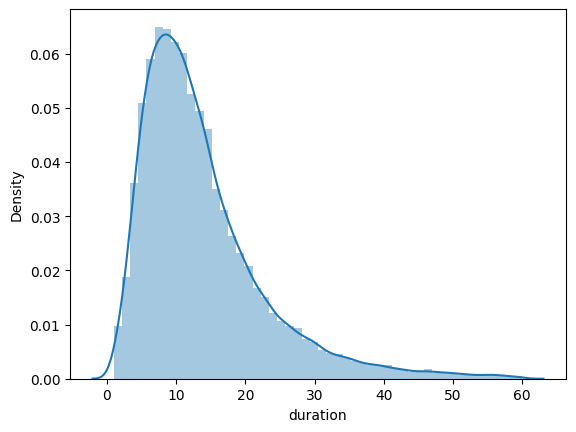

In [9]:
print(df.duration.describe(percentiles=[0.95, 0.98, 0.99]))

#sns.distplot(df.duration)
# sns.distplot(df[(df.duration >= pd.Timedelta("1m")) & (df.duration <= pd.Timedelta("60m"))].duration)

# Convert pandas.Timedelta to float of minutes
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

sns.distplot(df[(df.duration >= 1) & (df.duration <= 60)].duration)

In [10]:
# Prints percentage of 1min-60min trips compared to all data
print(((df.duration >= 1) & (df.duration <= 60)).mean())

# Most of the other trips are <1min trips
print((df.duration <= 1).mean())

# Remove outliers and keep datas of 1min-60min trips only
df = df[(df.duration >= 1) & (df.duration <= 60)]
print(df_raw.shape[0])
print(df.shape[0])

0.9614860921999611
0.029035737652738237
56551
54373



# Define training features

In [11]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# Select categorical and numerical features to guess trip duration

# Start and end location might determine the trip duration. 
# It would be better to have the exact addresses and aggregate on geological areas.
# Example: in city center trip durations might be longer because of traffic 
categorical = ['PULocationID', 'DOLocationID']

# Trip duration might also depend on distance
numerical = ['trip_distance']

# Convert categorical values to string instead integer because Dictionary Vectorizer 
# does onehot encoding only on non-integers.
df[categorical] = df[categorical].astype(str)

print(df[categorical + numerical].dtypes)

PULocationID      object
DOLocationID      object
trip_distance    float64
dtype: object


# Training and prediction

In [13]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

In [14]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 163119 stored elements and shape (54373, 449)>

Root mean squared error: 7.115040664529721


<Axes: ylabel='Count'>

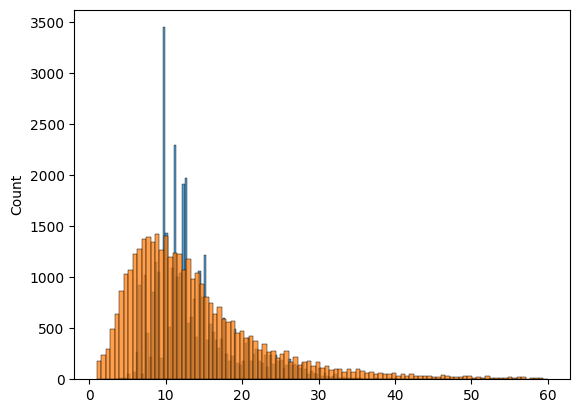

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f"Root mean squared error: {root_mean_squared_error(y_train, y_pred)}")

sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

# Train on January, validate on February

In [16]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']

    # Filter
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    return df

In [17]:
df_train = read_dataframe('./green_tripdata_2024-01.parquet')
df_val = read_dataframe('./green_tripdata_2024-02.parquet')

len(df_train), len(df_val)

(54373, 51497)

Performance: 7.265831283470444


/tmp/ipykernel_2670/3582302286.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_2670/3582302286.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


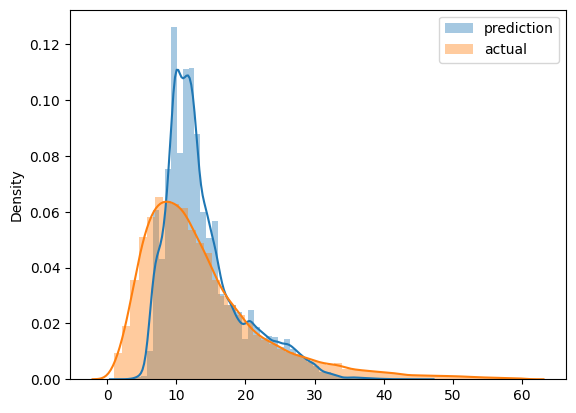

In [18]:
categorical = ['PULocationID', 'DOLocationID']
# categorical = ['PU_DO']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print(f"Performance: {root_mean_squared_error(y_val, y_pred)}")

sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [19]:
# Save model and dictionary vectorizer
with open('model/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

# My Train

[{'PULocationID': '236', 'DOLocationID': '239', 'trip_distance': 1.98}, {'PULocationID': '65', 'DOLocationID': '170', 'trip_distance': 6.54}, {'PULocationID': '74', 'DOLocationID': '262', 'trip_distance': 3.08}, {'PULocationID': '74', 'DOLocationID': '116', 'trip_distance': 2.4}, {'PULocationID': '74', 'DOLocationID': '243', 'trip_distance': 5.14}, {'PULocationID': '33', 'DOLocationID': '209', 'trip_distance': 2.0}, {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 3.2}, {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.01}, {'PULocationID': '226', 'DOLocationID': '226', 'trip_distance': 0.31}, {'PULocationID': '7', 'DOLocationID': '129', 'trip_distance': 2.32}, {'PULocationID': '42', 'DOLocationID': '75', 'trip_distance': 2.69}, {'PULocationID': '41', 'DOLocationID': '141', 'trip_distance': 3.73}, {'PULocationID': '130', 'DOLocationID': '196', 'trip_distance': 5.06}, {'PULocationID': '74', 'DOLocationID': '69', 'trip_distance': 2.93}, {'PULocationID': '41'

<Axes: ylabel='Count'>

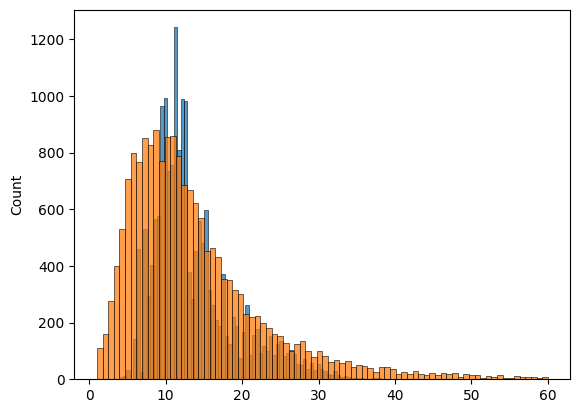

In [22]:
# Turn each row to dict
train_dicts = df[categorical + numerical].to_dict(orient='records')
print(train_dicts)

# Dictionary Vectorizer turns dictionaries to vectors
dv = DictVectorizer()

X = dv.fit_transform(train_dicts)
y = df['duration'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Feature names: {dv.feature_names_}")
print(f"Train set contains {X_train.shape[0]} records")
print(f"Test set contains {X_test.shape[0]} records")

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Performance: {root_mean_squared_error(y_test, y_pred)}")

sns.histplot(y_pred, label='prediction')
sns.histplot(y_test, label='actual')

# plt.legend()